In [2]:
import pandas as pd
import numpy as np

In [36]:
import os
from datetime import date    
today = date.today()
## Get output folder
dr = str(today.year)+str(today.month).zfill(2)
os.chdir('/Users/sara.runkel/Documents/13000Cities/')
output_dir = '/Users/sara.runkel/Documents/13000Cities/Outputs/' + dr +'/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print('Made monthly output directory')
if not os.path.exists(output_dir+today.isoformat()):
    os.makedirs(output_dir+today.isoformat())
    print('Made daily output directory')
output_dir = '/Users/sara.runkel/Documents/13000Cities/Outputs/' + dr +'/' + today.isoformat() +'/'

In [4]:
xls = pd.ExcelFile('./demographic/MSAGDP/MSA_Population.xlsx')
msa = pd.read_excel(xls, 'MSA_2010')
#pop_2019 = pd.read_excel(xls, '2019')
pop_2010 =pd.read_excel(xls, '2010')
us = pd.read_excel(xls,'US_13')
gdp = pd.read_excel(xls,'GDP')
m_19=pd.read_excel(xls,'Sheet4')

In [4]:
msa.merge(pop_2010['Label'], how ='right', on='Label').drop_duplicates(subset='Label').to_csv('Msa_pop_merge.csv')

In [9]:
full = pd.read_excel(xls, 'usa')

In [174]:
us_10[~us_10.index.isin(gdp.CityCountry)]

0          Abilene, United States (265)
1         Abington, United States (925)
2            Akron, United States (798)
3           Albany, United States (988)
4      Albuquerque, United States (196)
                     ...               
325         Yakima, United States (163)
326           York, United States (892)
327     Youngstown, United States (822)
328       Yuba City, United States (55)
329            Yuma, United States (60)
Name: CityCountry, Length: 330, dtype: object

In [6]:
msa_full =msa.merge(m_19[['Merge',2019]],how='left',left_on='Label',right_on='Merge')

In [11]:
from scipy.stats import linregress
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm



In [12]:
us_19= full.query("Year ==2019").copy().drop_duplicates().set_index('CityCountry')
us_19['Slope']= full.groupby('CityCountry').apply(lambda v: linregress(v.Year, v.NO2)[0])
us_10= full.query("Year ==2010").copy().drop_duplicates().set_index('CityCountry')


In [9]:
merge= us_19.reset_index().merge(gdp.reset_index(),how='left')
merge.set_index('CityCountry',inplace=True)

In [10]:
merge['Base_GDP'] =merge[2010]
merge['GDP'] =merge[2019]

In [11]:
merge['Base_NO2']=us_10['NO2']
merge['Base_Population']=us_10['Population']

In [12]:
merge['NO2T']=np.log(merge.NO2)
merge['BaseT']=np.sqrt(merge.Base_NO2)
merge['LogGDP']=np.log(merge[2010])
gdp.set_index('CityCountry', inplace=True)

In [13]:
f= pd.read_csv('./Inputs/unified_data_SR-v4.csv')
f= f[f.Country=='United States'].drop_duplicates().query('Year==2019').copy()
st =pd.read_csv('./Inputs/IDtoSt.csv')

In [14]:
indy=f.merge(st[['ID','State']], how='left').drop_duplicates(subset='CityCountry').set_index('CityCountry')
merge['State']=indy['State']

In [15]:
NW = ['WA','OR','ID']
SW=['CA','NV','UT','NM','AZ','CO']
NGP=['MT','WY','ND','SD','NE']
SGP=['TX','OK','KS']
SE=['LA','AR','AL','FL','MS','TN','KY','GA','SC','NC','DC','VA']
NE = ['WV','PA','NY','MD','DE','NH','VT','ME','MA','RI','NJ','CT']
MW =['WI','MO','MN','MI','IN','IL','IA','OH']
Other = ['AK','HI']

rdict = {'NW':NW,'SW':SW,'NGP':NGP,'SGP':SGP,'SE':SE,'NE':NE,'MW':MW,'Other':Other}

In [16]:
merge['Region']=''
for i in rdict:
    filter = merge["State"].isin(rdict[i])
    merge['Region'].where(~filter,i,inplace=True)


In [42]:
y= plot['NO2T']
X = plot[['BaseT','LogGDP','Region']]


In [43]:
from category_encoders import *
import pandas as pd
import numpy as np
enc = GLMMEncoder(cols=['Region']).fit(X,y)

In [44]:
numeric_dataset = enc.transform(X)
numeric_dataset

,BaseT,LogGDP,Region
0,3.204684,16.337559,0.073971
1,3.765634,16.166949,0.233597
2,3.629049,19.765188,0.073971
3,3.600000,19.650585,-0.086020
4,3.361547,16.047546,0.073971
...,...,...,...
325,3.395585,16.941568,-0.093868
326,3.675595,17.732526,-0.093868
327,3.144837,16.309429,-0.093868
328,3.840573,18.968620,-0.093868


In [45]:
X2 = sm.add_constant(numeric_dataset)
est = sm.OLS(y, X2)
est2 = est.fit()

In [47]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NO2T   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     164.2
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           7.67e-65
Time:                        07:19:19   Log-Likelihood:                 233.03
No. Observations:                 330   AIC:                            -458.1
Df Residuals:                     326   BIC:                            -442.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3743      0.096     14.349      0.000       1.186       1.563
BaseT          0.4111      0.024     16.877      0.000       0.363       0.459
LogGDP        -0.0309      0.005     -5.877      0.000      -0.041      -0.021
Region         0.5752      0.081      7.088      0.000       0.416       0.735
==============================================================================
Omnibus:                        4.530   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                5.161
Skew:                          -0.132   Prob(JB):                       0.0757
Kurtosis:                       3.553   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from sklearn import linear_model

def calculate_stats(dataframe):
    dataframe['Predicted']=np.exp(predicted)
    dataframe['Actual']= np.exp(actual)
    dataframe['pc_dif']=100*(dataframe.Actual-dataframe.Predicted)/dataframe.Actual
    dataframe['abs_dif']= dataframe['pc_dif'].abs()
    dataframe['Residuals']= dataframe.Actual-dataframe.Predicted


regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(numeric_dataset, y)
coef = regr.coef_
#coef = np.polyfit(x, y, z, 1)
inter = regr.intercept_
actual = []
predicted = []
for ind in range(len(numeric_dataset)):
    actual.append(y.iloc[ind])
    predicted.append(sum([coef[i]*numeric_dataset.iloc[ind][i] for i in range(len(coef))])+inter)
    

##predicted is predicted NO2/capita
calculate_stats(merge)


In [48]:
from scipy.stats.mstats import zscore
zx =zscore(numeric_dataset)
zy = zscore(y)
#zx2 = sm.add_constant(zx)
model = sm.OLS(zy,zx)
results = model.fit()
results.params

BaseT     0.674923
LogGDP   -0.226470
Region    0.269379
dtype: float64

In [23]:
pcap=msa_full.merge(gdp,how='right',on='CityCountry')

In [24]:
pcap['Base_PerCapita']=pcap['2010_y']/pcap['2010_x']
pcap['PerCapita']=pcap['2019_y']/pcap['2019_x']

In [25]:
pcap.set_index('CityCountry',inplace=True)

In [26]:
merge['PerCapita']=pcap['PerCapita']

In [27]:
merge['ConcPercChange']=100*(merge.NO2-merge.Base_NO2)/merge.Base_NO2

In [257]:
merge.columns

Index([    'Memberships',       'continent',            'Year',
                  'City',         'Country',        'Latitude',
             'Longitude',      'Population',             'NO2',
                'Pw_NO2',         'PAF_NO2',       'Cases_NO2',
             'Rates_NO2',         'Pop_ped',       'city_area',
             'NAME_LIST',           'Slope',           'index',
                    2010,              2019,        'Base_GDP',
                   'GDP',        'Base_NO2', 'Base_Population',
                  'NO2T',          'BaseT0',          'LogGDP',
                 'State',          'Region',           'BaseT',
             'Predicted',          'Actual',          'pc_dif',
               'abs_dif',       'Residuals',       'PerCapita',
        'ConcPercChange'],
      dtype='object')

In [28]:
import pandas as pd

# Sample air quality data (replace this with your own data)
plot = merge

# Define weights for each metric (adjust these weights as needed)
metrics = {'ConcPercChange':'ConcChange','Slope':'slope','Residuals':'resid'}

# Normalize the data using min-max scaling
for metric in metrics:
    min_val = plot[metric].min()
    max_val = plot[metric].max()
    plot[metrics[metric] + '_Score'] = (plot[metric] - min_val) / (max_val - min_val)

# Calculate scores for each city

# Calculate total scores for each city
plot['Total_Score'] = plot[['ConcChange_Score', 'slope_Score','resid_Score']].sum(axis=1)/3

# Rank cities based on total scores
plot = plot.sort_values(by='Total_Score', ascending=False)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
bins = list(plot['PerCapita'].quantile([0,0.25,.5,0.75,1]))
plot['GDPBins']=pd.cut(plot['PerCapita'], bins=bins, include_lowest=True)
palette = sns.color_palette("rocket_r")
palette.pop(4)
palette.pop(1)

(0.95381595, 0.46373781, 0.31769923)

In [32]:
plot.PerCapita.sort_values(ascending=False)

CityCountry
Albany, United States (988)             393.911876
Schenectady, United States (986)        393.911876
Troy, United States (997)               393.911876
Jacksonville, United States (598)       389.958275
Portland, United States (101)           284.482080
                                           ...    
Lake Havasu City, United States (72)     24.015524
Brownsville, United States (246)         23.803078
McAllen, United States (239)             22.946502
Ames, United States (482)                22.167862
Portland, United States (1050)           11.959000
Name: PerCapita, Length: 330, dtype: float64

In [41]:
plot['PopChange']=plot.Population-plot.Base_Population

bins = list(plot['PopChange'].quantile([0,0.25,.5,0.75,1]))
plot['PopChangeBins']=pd.cut(plot['PopChange'], bins=bins)

In [50]:
import seaborn as sns

In [58]:
import matplotlib.pyplot as plt

Rate of Change
% Change Concentration
Regression Residual


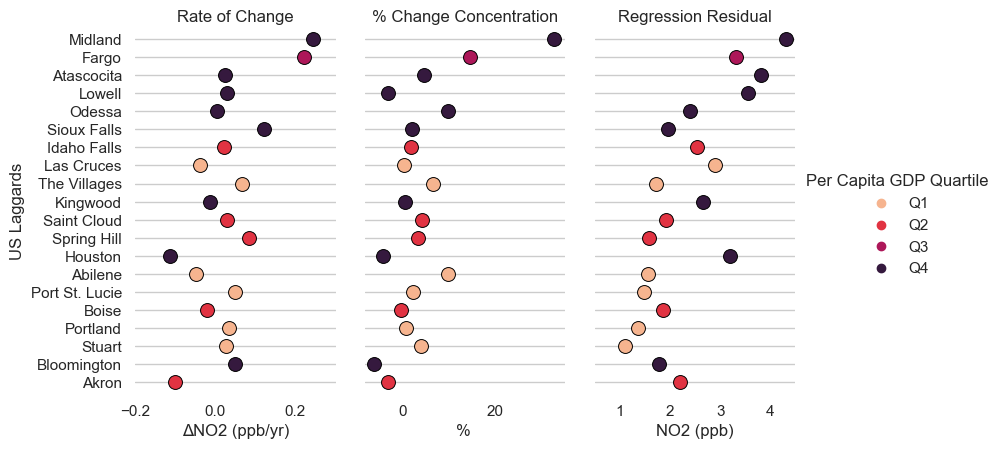

In [72]:
sns.set(font_scale=1)
sns.set_theme(style='white')
hue_order = ['0.10','0.25','0.50','0.75','0.90','1.00','NA']
splot = plot.head(20).copy().reset_index()
#splot['City']=splot.CityCountry.str.split(',',expand=True)[0]
g = sns.PairGrid(splot,hue= 'GDPBins',#hue_order=hue_order,palette='crest',
                 x_vars=['Slope','ConcPercChange',"Residuals"], y_vars=["City"],
                 height=len(splot)/10*2.2, aspect=11.5/len(splot),palette=palette )

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10,orient="h", jitter=False,palette=palette,
      linewidth=0.7, edgecolor="black")

# Use the same x axis limits on all columns and add better labels
g.set(ylabel= 'US Laggards')
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")
g.add_legend(title='Per Capita GDP Quartile')
new_labels = ['Q1','Q2','Q3','Q4']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
#g.legend(labels = ['Q1','Q2','Q3','Q4'])
#g.tight_layout()
# Use semantically meaningful titles for the columns
titles = ["Rate of Change","% Change Concentration", "Regression Residual"]
         # "County GDP","Population Change"]
xlabels = {'ΔNO2 (ppb/yr)':(-0.2,0.3),'% ':(-8,35),'NO2 (ppb)':(0.5,4.5),}


for ax, title, xlabel in zip(g.axes.flat, titles ,xlabels):
    print(title)
    # Set a different title for each axes
    ax.set(title=title, xlabel=xlabel,xlim=xlabels[xlabel])

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)


sns.despine(left=True, bottom=True)
plt.savefig(output_dir+'/CitiesStripPlot_bottom20_SlopePopChange.png',bbox_inches='tight',dpi=200)

Rate of Change
% Change Concentration
Regression Residual


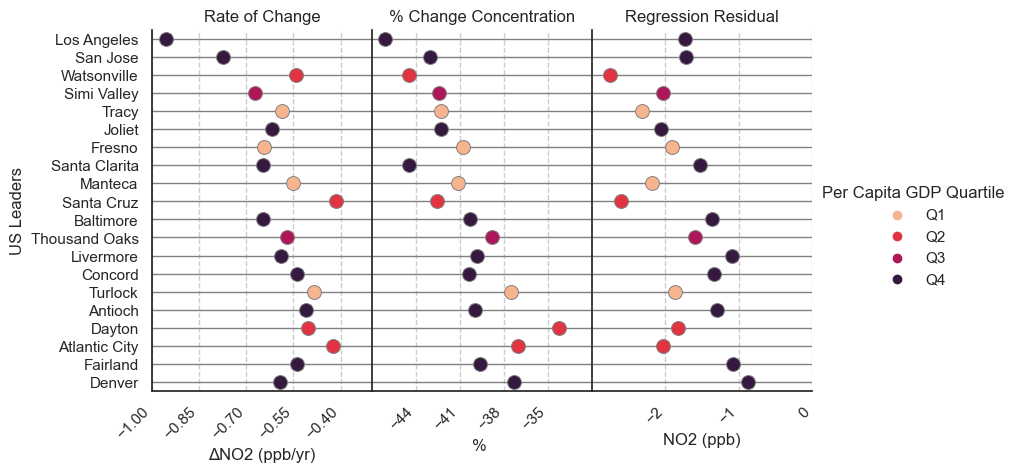

In [90]:
# Make the PairGrid
#palette = sns.color_palette("rocket_r")
#palette.append("0.7")
#sns.set_style("darkgrid")

sns.set(font_scale=1)
sns.set_theme(style='white')
#hue_order = ['0.10','0.25','0.50','0.75','0.90','1.00','NA']
splot = plot.tail(20).copy().reset_index()
#splot['City']=splot.CityCountry.str.split(',',expand=True)[0]
g = sns.PairGrid(splot.sort_values(by='Total_Score',ascending=True),hue= 'GDPBins',#hue_order=hue_order,palette='crest',
                 x_vars=['Slope','ConcPercChange',"Residuals"], y_vars=["City"],
                 height=len(splot)/10*2.2, aspect=11.5/len(splot),palette=palette )

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10,orient="h", jitter=False,palette=palette,
      linewidth=0.7, edgecolor="0.5")

# Use the same x axis limits on all columns and add better labels
g.set(ylabel= 'US Leaders')
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")
g.add_legend(title='Per Capita GDP Quartile')
#g.tight_layout()
new_labels = ['Q1','Q2','Q3','Q4']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
# Use semantically meaningful titles for the columns
titles = ["Rate of Change","% Change Concentration", "Regression Residual"]
         # "County GDP","Population Change"]
xlabels = {'ΔNO2 (ppb/yr)':(-1,-.3),'% ':(-47,-32),'NO2 (ppb)':(-3,0),}

tt={"Rate of Change":np.arange(-1,-0.31,0.15),"% Change Concentration": np.arange(-44,-32,3), "Regression Residual":np.arange(-2,0.1,1)}


for ax, title, xlabel in zip(g.axes.flat, titles ,xlabels):
    print(title)
    # Set a different title for each axes
    ax.set_xticks(ticks =tt[title],rotation=70)
    ax.set(title=title, xlabel=xlabel,xlim=xlabels[xlabel])
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True, linestyle='--')
    ax.yaxis.grid(True, color='0.5')

plt.subplots_adjust(hspace=-0.1, wspace=0)#
#sns.despine(left=True, bottom=True)
plt.savefig(output_dir+'/CitiesStripPlot_top20_SlopePopChange.png',bbox_inches='tight',dpi=200)

In [45]:
plot['Base_PerCapita']=pcap['Base_PerCapita']

In [46]:
plot.to_csv('Inputs/US_LeadersLaggards_ds.csv')

In [7]:
plot=pd.read_csv('Inputs/US_LeadersLaggards_ds.csv')

In [20]:
plot.set_index('CityCountry',inplace=True)
plot['Base_Pop_ped']=us_10.Pop_ped

In [18]:
def calculate_af(no2, rr=1.26):
    """Calculate the fraction of asthma burden attributable to NO2 
    concentrations (i.e., the attributable fraction = AF) based on the     
    concentration-response factor (from the meta-analysis of epidemiological 
    studies) and gridded average NO2 concentrations. 
    
    Parameters
    ----------
    no2 : numpy.ndarray
        NO2 concentrations, units of ppb, [lat, lng]
    rr : float
        Relative risk (e.g., 1.26 (1.10-1.37) per 10 ppb)

    Returns
    -------
    af : numpy.ndarray
    New paediatric asthma cases attributable to NO2, units of percent, 
    [lat, lng]
    
    References
    ----------
    P. Achakulwisut, M. Brauer, P. Hystad, S. C. Anenberg, Global, national, 
        and urban burdens of paediatric asthma incidence attributable to 
        ambient NO2 pollution: estimates from global datasets. The Lancet 
        Planetary Health 3, e166–e178 (2019).
    S. C. Anenberg, L. W. Horowitz, D. Q. Tong, J. J. West, An Estimate of the 
        Global Burden of Anthropogenic Ozone and Fine Particulate Matter on 
        Premature Human Mortality Using Atmospheric Modeling. Environmental 
        Health Perspectives 118, 1189–1195 (2010).
    H. Khreis, et al., Exposure to traffic-related air pollution and risk of 
        development of childhood asthma: A systematic review and meta-
        analysis. Environment International 100, 1–31 (2017).        
    """
    import numpy as np
    # This the concentration-response factor of 1.26 (1.10 - 1.37) per 10 
    # ppb is used in Achakulwisut et al. (2019) and taken from Khreis et al. 
    # (2017). Note that this "log-linear"  relationship comes from 
    # epidemiological studies that log-transform concentration before 
    # regressing with incidence of health outcome (where log is the natural 
    # logarithm). Additional details can be found in Anenberg et al. (2010)
    beta = np.log(rr)/10.
    af = (1-np.exp(-beta*no2))
    return af 


In [24]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [26]:
asthma= pd.read_csv('Inputs/asthmaincidence/IHME-GBD_2019_DATA-bd31445e-1.csv')
asthma['location_name']=asthma.location_name.replace(us_state_to_abbrev)
asthma

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,6,Incidence,558,OH,3,Both,158,<20 years,515,Asthma,3,Rate,2000,1998.168250,2643.602497,1406.165899
1,6,Incidence,558,OH,3,Both,158,<20 years,515,Asthma,3,Rate,2001,2005.219259,2656.911542,1421.617358
2,6,Incidence,558,OH,3,Both,158,<20 years,515,Asthma,3,Rate,2002,2018.003306,2682.499705,1437.735363
3,6,Incidence,558,OH,3,Both,158,<20 years,515,Asthma,3,Rate,2003,2033.140734,2705.427557,1454.390425
4,6,Incidence,558,OH,3,Both,158,<20 years,515,Asthma,3,Rate,2004,2052.153345,2719.071623,1472.919777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,6,Incidence,572,WI,3,Both,158,<20 years,515,Asthma,3,Rate,2015,2241.892769,2778.520837,1677.201050
1016,6,Incidence,572,WI,3,Both,158,<20 years,515,Asthma,3,Rate,2016,2239.523810,2810.815551,1673.507232
1017,6,Incidence,572,WI,3,Both,158,<20 years,515,Asthma,3,Rate,2017,2240.727595,2875.676519,1667.425660
1018,6,Incidence,572,WI,3,Both,158,<20 years,515,Asthma,3,Rate,2018,2274.922298,2902.046952,1658.991070


In [27]:
plot=plot.merge(asthma.query('year==2010')[['location_name','val']],how='left',left_on='State',right_on='location_name').drop_duplicates().rename(columns={'val':'asthma_2010'})
plot=plot.merge(asthma.query('year==2019')[['location_name','val']],how='left',left_on='State',right_on='location_name').drop_duplicates().rename(columns={'val':'asthma_2019'})

In [30]:
plot['ActualAF']=plot.Actual.apply(calculate_af)
plot['PredictedAF']=plot.Predicted.apply(calculate_af)
plot['BaseAF'] =plot.Base_NO2.apply(calculate_af)
plot['Actual_Cases'] = plot.ActualAF*(plot.asthma_2019/1e5)*plot.Pop_ped
plot['Predicted_Cases'] = plot.PredictedAF*(plot.asthma_2019/1e5)*plot.Pop_ped
plot['Base_Cases'] = plot.BaseAF*(plot.asthma_2010/1e5)*plot.Base_Pop_ped
plot['Cases_Residual']=plot.Actual_Cases-plot.Predicted_Cases
plot['Rates_Residual'] = plot['Cases_Residual']/(plot.Pop_ped/1e5)

In [39]:
plot.to_csv('Inputs/us_asthmaprediction.csv')